## Data Wrangling

Otherwise known as data cleaning or pre processing, data wrangling is the process of converting data from it's inital condition into a format that may be better for analysis. </br>
In this notebook, we will:
- Handle missing values
- Correct data format
- Standardize data
- Normalize data

In [1]:
import pandas as pd
import matplotlib.pylab as plt

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

In [3]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [4]:
df = pd.read_csv(url, names = headers)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Identifying and handling missing values

In [5]:
import numpy as np

df.replace('?', np.nan, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Evaluation for Missing Data

In [6]:
missing_data = df.isnull()
missing_data.head()
# values with True indicate a missing value

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Let's count how many missing values we have in each column

In [7]:
for column in missing_data.columns.values.tolist():
    print (column)
    print(missing_data[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

### We can now see, 7 of the columns contain missing data:

1. "normalized-losses": 41 missing values
2. "num-of-doors": 2 missing values
3. "bore": 4 missing values
4. "stroke": 4 missing data
5. "horsepower": 2 missing data
6. "peak-rpm": 2 missing values
7. "price": 4 missing values

### Dealing with missing data


#### Dealing with missing values in "normalized-losses" column

__Replace by mean:__
- "normalized-losses"
- "stroke"
- "bore"
- "horsepower"
- "peark-rpm"
- Reason: Distribution is normal so average makes most sense.

__Replace by mode:__
- "num-of-doors"
- Reason: 84% of the autos are four door. Since it is the most frequent, it is the most likely to occur

__Drop the whole row:__
- "price"
- Reason: Since price is what we are trying to predict, any entry without price is not useful to us.

__Drop the whole column:__
- None
- Reason: Whole columns should only be dropped if most entries in the column are empty.

#### Dealing with missing values in "normalize-losses" column

In [8]:
# Calculating mean
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("AVG of normalized-losses: " ,avg_norm_loss)

AVG of normalized-losses:  122.0


In [9]:
# Replacing "NaN" with mean
df["normalized-losses"].replace(np.nan, avg_norm_loss,inplace=True)

#### Dealing with missing values in "bore" column

In [10]:
# Calculating mean
avg_bore = df['bore'].astype("float").mean(axis=0)
print("AVG of bore: ", avg_bore)

AVG of bore:  3.3297512437810943


In [11]:
# Replacing "NaN" with mean
df['bore'].replace(np.nan, avg_bore, inplace=True)

#### Dealing with missing values in "stroke" column

In [12]:
# Calculating mean
avg_stroke = df['stroke'].astype('float').mean(axis=0)
print('AVG of stroke: ', avg_stroke)

AVG of stroke:  3.255422885572139


In [13]:
# Replacing "NaN" with mean
df['stroke'].replace(np.nan, avg_stroke, inplace=True)

#### Dealing with missing values in "horsepower" column

In [14]:
# Calculating mean
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("AVG of horsepower : ", avg_horsepower)

AVG of horsepower :  104.25615763546799


In [15]:
# Replacing "Nan" with mean
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

#### Dealing with missing values in "peak-rpm" column

In [16]:
# Calculating mean
avg_peakrpm = df['peak-rpm'].astype('float').mean(axis=0)
print("AVG of peak-rpm: ", avg_peakrpm)

AVG of peak-rpm:  5125.369458128079


In [17]:
# Replacing "Nan" with mean
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

#### Dealing with missing values in "num-of-doors"

In [18]:
# We can see the most common type
print('Mode: ',df['num-of-doors'].value_counts().idxmax())

Mode:  four


In [19]:
# Replacing NaN with mode
df['num-of-doors'].replace(np.nan, 'four', inplace=True)

#### Dealing with missing values in "price"

In [20]:
# for these we are simply dropping the entire row
df.dropna(subset=['price'], axis=0, inplace=True)
# since we dropped rows, we should reset the index
df.reset_index(drop=True, inplace=True)

In [21]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### No more missing values!!!

### Now, let's make sure all the data is in the correct format.

In [22]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

__Some of these types are wrong__
- numerical values should be float or int
- strings should be objects


In [23]:
df[['bore','stroke','price','peak-rpm']] = df [['bore','stroke','price','peak-rpm']].astype('float')
df[['normalized-losses']] = df[['normalized-losses']].astype("int")


In [24]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### Standardizing our data!

In [25]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


We have two fuel consumption related columns, these are:
- "city-mpg"
- "highway-mpg"

We need to apply __data transformation__ to get this data into the units of L/100km. </br>
We can easily do this to the entire columns in Pandas

In [26]:
# formula:    L/100KM = 235/MPG
df['city-mpg'] = 235/df['city-mpg']
df['highway-mpg'] = 235/df['highway-mpg']
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0


Let's rename our columns to more accurately represent their values

In [27]:
df.rename(columns={'highway-mpg':'highway-L/100km',
                   'city-mpg':'city-L/100km'},inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0


### Normalizing our data!!

This is the process of transforming values into a similar range.</br>
Let's start with 'length', 'width', and 'height'.

In [28]:
# simple feature scaling
# replacing value with (value/max value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

In [29]:
df[['length','width','height']].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


Great, now our values are normalized within the range of [0,1].

### Binning our data!!!
This is the process of transforming contiouns numerical variables into discrete categories, 'bins', for grouped analysis. </br></br>
In our dataset, we only care about the price difference between cars with high horspower, medium horsepower, and little horsepower.</br>
We can rearrange them into three bins to simplify analysis

In [30]:
# converting data into correct format
df['horsepower']=df['horsepower'].astype(int, copy=True)

A histogram can help us see the distribution.

Text(0.5, 1.0, 'horsepower bins')

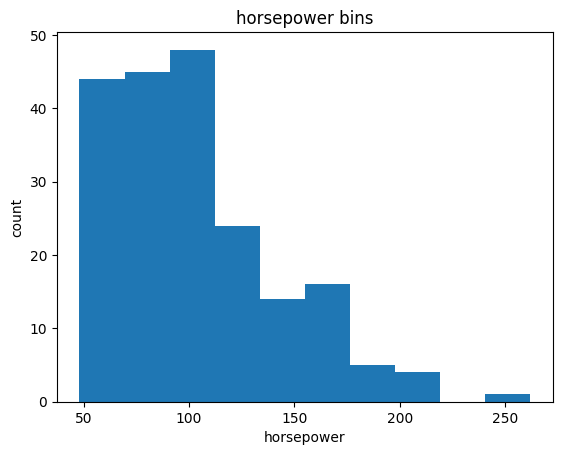

In [31]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df['horsepower'])

plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

__Creating our bins__

We need 3 bins of equal size bandwith. </br> Our starting point would be the minimum value we have for horsepower. </br>Similarly, our ending point would be the maximum value we have for horsepower.

In [32]:
start_value = df['horsepower'].min()
end_value = df['horsepower'].max()

Since we are creating 3 bins of equal length. We need to have 4 dividers.</br>
We will be using Numpy's linspace function to get equally spaced values.

In [33]:
bins = np.linspace(start_value, end_value,4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

Now, it's time to sort our values into their bins.</br>
We do this by adding a new variable, simply a new column that will represent which bin they belong to.</br>
In order to this, we will use Panda's cut method.

In [34]:
# set bin names
group_names = ['Low','Medium','High']
# separate values into bins
df['horsepower-binned'] = pd.cut(df['horsepower'],
                               bins, labels=group_names,
                               include_lowest=True)
df[['horsepower','horsepower-binned']].head()

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low


Let's see the distribution

Text(0.5, 1.0, 'horsepower bins')

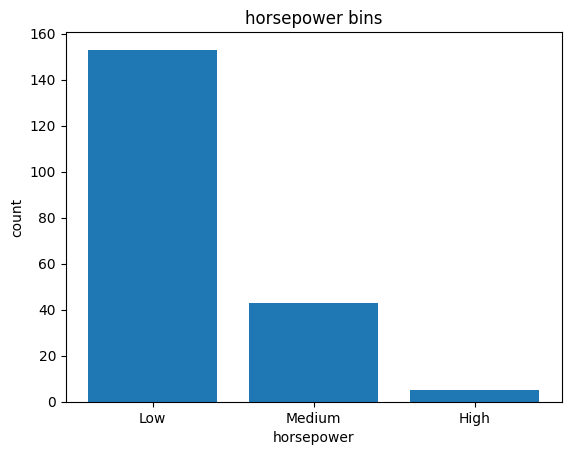

In [35]:
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

We have succesfully narrowed down the intervals of this variable from 59 to 3! </br>
Typically however, a histogram is used to visualize the distribution between bins.

### Creating a Dummy Variable (Indicator Variable)

- A dummy variable, is a numerical variable used to label categories.
- They are called dummies because the numbers themselves don't have any inherent meaning
- This is useful so that we can use categorical variables for regression analysis later

__Fuel Type__
- Fuel Type has only two unique values, 'gas' or 'diesel'
- Unfortunately, regression doesn't understand words. Only numbers.


In [36]:
# Pandas function will create dummy variables and assign them value
dummy_variable_1 = pd.get_dummies(df['fuel-type'])
# Changing names for clarity
dummy_variable_1.rename(columns={'gas':'fule-type-gas','diesel':'fuel-type-diesel'},
                       inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fule-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


Now let's merge our dummy variables back into our dataframe.

In [37]:
# merging dataframes
df = pd.concat([df,dummy_variable_1], axis=1)
# dropping original column we derived dummy variables from
df.drop('fuel-type', axis=1, inplace=True)

In [38]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fule-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0,Low,0,1


__Aspiration__

In [39]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

Another similar variable, _aspiration_, also has only 2 values, both objects.</br>
It would be helpful to remove these from the equation and replace them with indicator/dummy variables

In [40]:
dummy_aspiration = pd.get_dummies(df['aspiration'])
dummy_aspiration.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [41]:
dummy_aspiration.rename(columns={'std':'aspiration-std','turbo':'aspiration-turbo'},
                        inplace=True)
dummy_aspiration.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


Now, we'll merge our dataframes and drop our original variable from which we dervied our indicators.

In [42]:
df = pd.concat([df,dummy_aspiration], axis=1)

df.drop('aspiration', axis=1, inplace=True)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fule-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,11.190476,8.703704,13495.0,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,11.190476,8.703704,16500.0,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,12.368421,9.038462,16500.0,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,9.791667,7.833333,13950.0,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500.0,13.055556,10.681818,17450.0,Low,0,1,1,0


### Lastly, we'll save our progress

In [43]:
df.to_csv('autos_clean_df.csv')